# Race Pace Analysis - Gulf Air Bahrain Formula 1 Grand Prix 2024 - Round 1

### Race Results

- P1 Max Verstappen
- P2 Sergio Perez
- P3 Carlos Sainz Jr. 

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

In [2]:
ff1.Cache.enable_cache('../cache')

In [ ]:
YEAR = 2024
RACE = 1
SESSION = 'R'

session_race = ff1.get_session(YEAR, RACE, SESSION)
session_race.load()

In [4]:
MAX, PEREZ, SAINZ = 'VER', 'PER', 'SAI'

In [ ]:
laps = session_race.laps

MAX_laps = laps.pick_driver(MAX)
PEREZ_laps = laps.pick_driver(PEREZ)
SAINZ_laps = laps.pick_driver(SAINZ)

MAX_fastest = MAX_laps.pick_fastest()
PEREZ_fastest = PEREZ_laps.pick_fastest()
SAINZ_fastest = SAINZ_laps.pick_fastest()

MAX_car_data = MAX_fastest.get_car_data()
PEREZ_car_data = PEREZ_fastest.get_car_data()
SAINZ_car_data = SAINZ_fastest.get_car_data()

## Fastest Lap Ananlysis - Race 

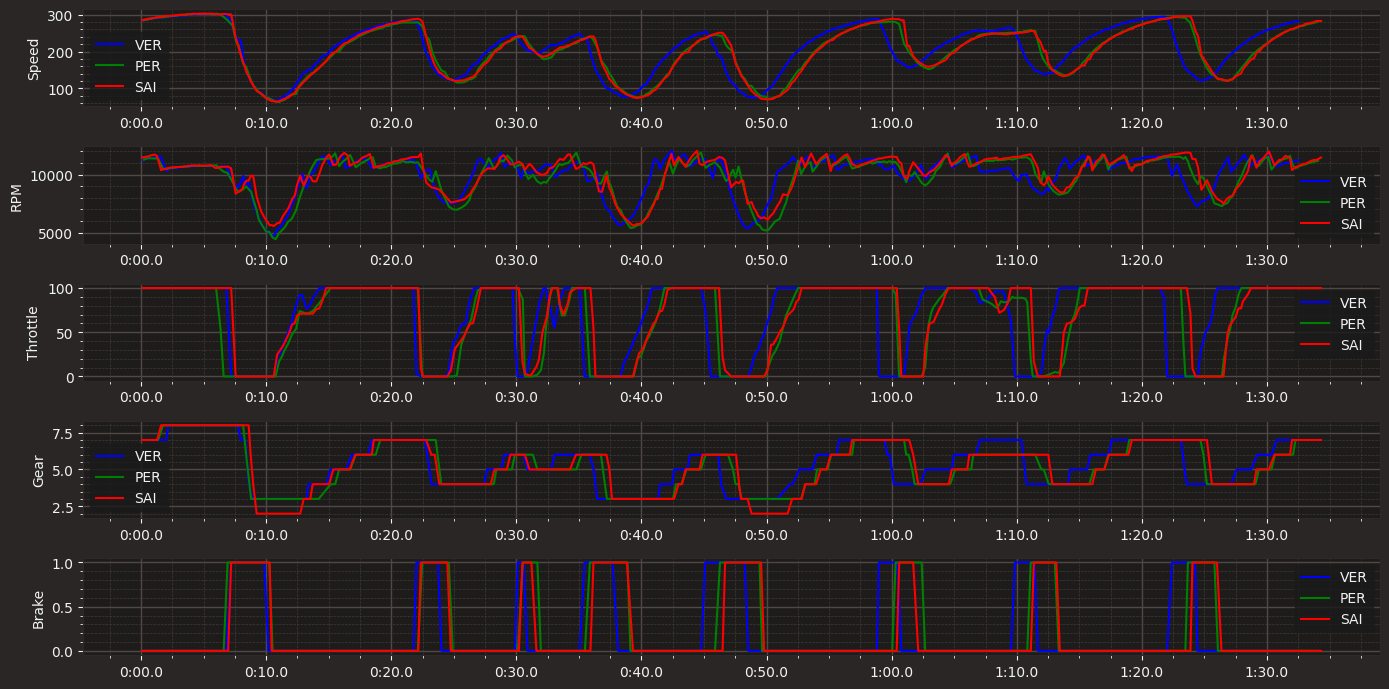

In [19]:
plotting.setup_mpl()

fig, ax = plt.subplots(5, figsize=(14, 7))

MAX_color, PEREZ_color, SAINZ_color = "blue", "green", "red"

ax[0].plot(MAX_car_data['Time'], MAX_car_data['Speed'], color=MAX_color, label=MAX)
ax[0].plot(PEREZ_car_data['Time'], PEREZ_car_data['Speed'], color=PEREZ_color, label=PEREZ)
ax[0].plot(SAINZ_car_data['Time'], SAINZ_car_data['Speed'], color=SAINZ_color, label=SAINZ)
ax[0].legend()
ax[0].set_ylabel('Speed')

ax[1].plot(MAX_car_data['Time'], MAX_car_data['RPM'], color=MAX_color, label=MAX)
ax[1].plot(PEREZ_car_data['Time'], PEREZ_car_data['RPM'], color=PEREZ_color, label=PEREZ)
ax[1].plot(SAINZ_car_data['Time'], SAINZ_car_data['RPM'], color=SAINZ_color, label=SAINZ)
ax[1].legend()
ax[1].set_ylabel('RPM')

ax[2].plot(MAX_car_data['Time'], MAX_car_data['Throttle'], color=MAX_color, label=MAX)
ax[2].plot(PEREZ_car_data['Time'], PEREZ_car_data['Throttle'], color=PEREZ_color, label=PEREZ)
ax[2].plot(SAINZ_car_data['Time'], SAINZ_car_data['Throttle'], color=SAINZ_color, label=SAINZ)
ax[2].legend()
ax[2].set_ylabel('Throttle')

ax[3].plot(MAX_car_data['Time'], MAX_car_data['nGear'], color=MAX_color, label=MAX)
ax[3].plot(PEREZ_car_data['Time'], PEREZ_car_data['nGear'], color=PEREZ_color, label=PEREZ)
ax[3].plot(SAINZ_car_data['Time'], SAINZ_car_data['nGear'], color=SAINZ_color, label=SAINZ)
ax[3].legend()
ax[3].set_ylabel('Gear')

ax[4].plot(MAX_car_data['Time'], MAX_car_data['Brake'], color=MAX_color, label=MAX)
ax[4].plot(PEREZ_car_data['Time'], PEREZ_car_data['Brake'], color=PEREZ_color, label=PEREZ)
ax[4].plot(SAINZ_car_data['Time'], SAINZ_car_data['Brake'], color=SAINZ_color, label=SAINZ)
ax[4].legend()
ax[4].set_ylabel('Brake')

plt.tight_layout()

### Bahrain Circuit Layout

<div style="height: 300px; width: 100%;">
    <img src='./images/bahraincct.jpg' alt="Bahrain Circut Layout" />
</div>

### Some interesting takes from the Fastest Laps Telemetry. 

From the 35th second, i.e. at Turn 8, we can clearly see Verstappen braking early, and getting on the Throttle a bit faster than Perez and Sainz. 
Before Turn 9, we can see him disaccelerating more quickly than Perez and Sainz, and getting on the throttle early. 
If you will observe the Speed, Throttle and Brake graph from <font color='red'>00:37.5s mark to 01:00s mark</font> from Turn 8 to Turn 11, you will clearly see a massive difference between Verstappen vs Perez and Sainz.

Verstappen continues to do the same thing across the entire lap. 
Verstapping reaching the 300 km/hr mark early in comparision to Perez and Sainz.
#### The difference is absolutely massive!!!!!!!!!!!!!!!!!!

Therefore Verstappen and Perez having the same car, Max(P1) finished the race <em>+22.457s ahead of his teammate Sergio Perez(P2).</em>

## Sainz 2nd Stint(on HARD Tyres) vs Max 2nd Stint(on HARD Tyres) in Clean Air

In [84]:
MAX_2nd_Stint = MAX_laps.loc[MAX_laps['Stint'] == 2]
MAX_2nd_Stint_length = MAX_2nd_Stint['LapNumber'].max() - MAX_2nd_Stint['LapNumber'].min()

Sainz_2nd_Stint = SAINZ_laps.loc[SAINZ_laps['Stint'] == 2]
Sainz_2nd_Stint_length = Sainz_2nd_Stint['LapNumber'].max() - Sainz_2nd_Stint['LapNumber'].min()

MAX_2nd_Stint = MAX_2nd_Stint.iloc[1:] 
Sainz_2nd_Stint = Sainz_2nd_Stint.iloc[1:]

min_length = min(MAX_2nd_Stint_length, Sainz_2nd_Stint_length)


MAX_2nd_Stint = MAX_2nd_Stint[['Sector1Time', 'Sector2Time', 'Sector3Time']]
Sainz_2nd_Stint = Sainz_2nd_Stint[['Sector1Time', 'Sector2Time', 'Sector3Time']]

MAX_2nd_Stint = MAX_2nd_Stint.iloc[:min_length - 1]
Sainz_2nd_Stint = Sainz_2nd_Stint.iloc[:min_length - 1]


MAX_2nd_Stint['Sector1Time'] = MAX_2nd_Stint['Sector1Time'].apply(lambda x: x.total_seconds())
MAX_2nd_Stint['Sector2Time'] = MAX_2nd_Stint['Sector2Time'].apply(lambda x: x.total_seconds())
MAX_2nd_Stint['Sector3Time'] = MAX_2nd_Stint['Sector3Time'].apply(lambda x: x.total_seconds())

Sainz_2nd_Stint['Sector1Time'] = Sainz_2nd_Stint['Sector1Time'].apply(lambda x: x.total_seconds())
Sainz_2nd_Stint['Sector2Time'] = Sainz_2nd_Stint['Sector2Time'].apply(lambda x: x.total_seconds())
Sainz_2nd_Stint['Sector3Time'] = Sainz_2nd_Stint['Sector3Time'].apply(lambda x: x.total_seconds())

MAX_2nd_Stint['LapTime'] = MAX_2nd_Stint['Sector1Time'] + MAX_2nd_Stint['Sector2Time'] + MAX_2nd_Stint['Sector3Time']
Sainz_2nd_Stint['LapTime'] = Sainz_2nd_Stint['Sector1Time'] + Sainz_2nd_Stint['Sector2Time'] + Sainz_2nd_Stint['Sector3Time']

# MAX_2nd_Stint.dtypes
MAX_2nd_Stint.reset_index(drop=True, inplace=True)
Sainz_2nd_Stint.reset_index(drop=True, inplace=True)

differences = MAX_2nd_Stint[['Sector1Time', 'Sector2Time', 'Sector3Time']] - Sainz_2nd_Stint[['Sector1Time', 'Sector2Time', 'Sector3Time']]

colors = ['red' if diff < 0 else 'blue' for diff in differences.values.flatten()]

sector1_times = differences['Sector1Time']
sector2_times = differences['Sector2Time']
sector3_times = differences['Sector3Time']

sector1_colors = ['blue' if time >= 0 else 'red' for time in sector1_times]
sector2_colors = ['blue' if time >= 0 else 'red' for time in sector2_times]
sector3_colors = ['blue' if time >= 0 else 'red' for time in sector3_times]

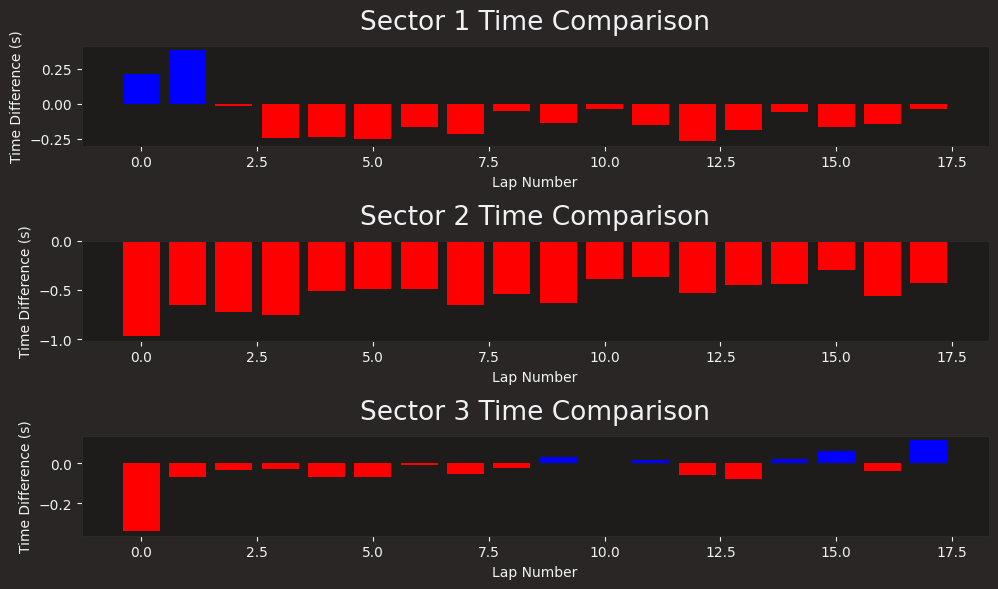

In [86]:
plt.figure(figsize=(10, 6))
min_length -= 2

plt.subplot(3, 1, 1)
plt.bar(range(len(sector1_times)), sector1_times, color=sector1_colors)
plt.title(f'Sector 1 Time Comparison')
plt.xlabel('Lap Number')
plt.ylabel('Time Difference (s)')

plt.subplot(3, 1, 2)
plt.bar(range(len(sector2_times)), sector2_times, color=sector2_colors)
plt.title(f'Sector 2 Time Comparison')
plt.xlabel('Lap Number')
plt.ylabel('Time Difference (s)')

plt.subplot(3, 1, 3)
plt.bar(range(len(sector3_times)), sector3_times, color=sector3_colors)
plt.title(f'Sector 3 Time Comparison')
plt.xlabel('Lap Number')
plt.ylabel('Time Difference (s)')

plt.tight_layout()
plt.show()

The above graph represents the sector wise time difference between Sainz and Max in their 2nd stints(BOTH ON THE HARD TYRES) of the race.
Carlos was on hard tyres for 20 laps and Max was on hard tyres for 20 Laps(including the pitstops)
The difference shown below is for 17 Laps only.

**Red** means <font color='red'>Sainz was faster</font> in that sector
**Blue** means <font color='blue'>Max was faster</font> in that sector

From this it seems that Sainz was faster in the 2nd stints